In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [10]:
names = ['sepal-length', 'sepal-width','petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv',names=names)

In [11]:
print(dataset.shape)

(150, 5)


In [12]:
print(dataset.head(20))


    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [13]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

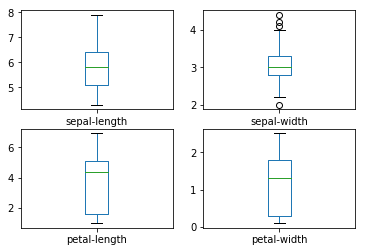

In [15]:
dataset.plot(kind='box', subplots=True, layout=(2,2),sharex=False,sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d0284f98>,
      dtype=object)

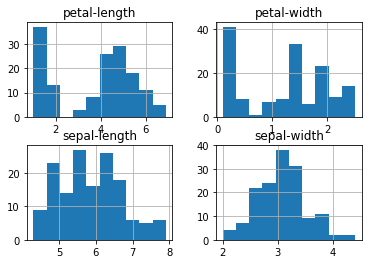

In [16]:
dataset.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d00e5940>,
      dtype=object)

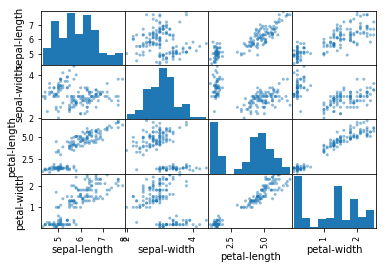

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)

In [18]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [19]:
# Applying KNN algo to train the model and predict accuracy for testing dataset
model = KNeighborsClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Accuracy score of KNN : ')
print(accuracy_score(y_test, predictions))


Accuracy score of KNN : 
0.9


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [21]:
# Applying SVM model to train and test
model = SVC(gamma='auto')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Accuracy score of SVM : ')
print(accuracy_score(y_test, predictions))

Accuracy score of SVM : 
0.9333333333333333


In [22]:
# Applying Randomforest algorithm(non linear algo) to train and test

model = RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Accuracy score of Randomforest Classifier : ')
print(accuracy_score(y_test, predictions))

Accuracy score of Randomforest Classifier : 
0.8666666666666667


In [23]:
# Applying Logistic Regression to train and test

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Accuracy score of Logical Regression: ')
print(accuracy_score(y_test, predictions))



Accuracy score of Logical Regression: 
0.8


In [24]:
#Applying Gaussian NAive Bayes to train and test

model = GaussianNB()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print ('Accuracy score of GaussianNB: ')
print (accuracy_score(y_test, predictions))


Accuracy score of GaussianNB: 
0.8333333333333334


In [25]:
#Applying Linear Discriminant Analysis to train and test accuracy

model = LinearDiscriminantAnalysis()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print ('Accuracy score of Linear_Discriminant_analysis: ')
print (accuracy_score(y_test, predictions))

Accuracy score of Linear_Discriminant_analysis: 
0.9666666666666667


In [26]:
#Applying Decision tree Classifier algo to train and test

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print ('Accuracy score of DEcision tree classifier: ')
print (accuracy_score(y_test,predictions))

Accuracy score of DEcision tree classifier: 
0.8666666666666667


In [27]:
#K-MEANS CLUSTERING ON IRIS DATASET

In [28]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [29]:
iris = datasets.load_iris()

x = pd.DataFrame(iris.data)

x.columns = ['Sepal_Length','Sepal_width','Petal_Length','Petal_width']

y = pd.DataFrame(iris.target)

y.columns = ['Targets']


In [30]:
model=KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Iris scatter plot(without clustering)')

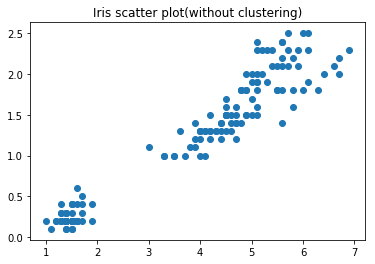

In [31]:
plt.scatter(x.Petal_Length, x.Petal_width)
plt.title('Iris scatter plot(without clustering)')

Text(0.5, 1.0, 'Classification K-means ')

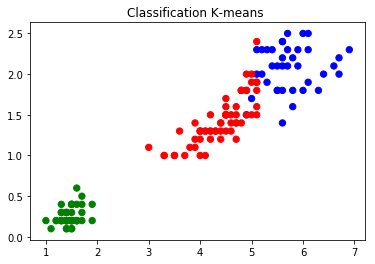

In [32]:
colormap=np.array(['Red','green','blue'])


plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')